##Credit Risk data AutoML

####Abstract
The main aim is to find which all variables are making most sense. And to evaluate the accuracy of the model using H2O Auto ML. Another aim is to find which all features has high multi-collienarity.

####Data Set
The data set consists of :

The dataset consists of 12 attributes variables person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, person_home_ownership, loan_intent, loan_grade,loan_status, cb_person_default_on_file
Loan status attribute is the dependent variable where 0 if the client has repaid the loan amount and 1 if he/she has not.
There a total of 18000 observations in the dataset to track the loan status.


####Variable Description

person_age	Age

person_income	Annual Income

person_home_ownership	Home ownership

person_emp_length	Employment length (in years)

loan_intent	Loan intent

loan_grade	Loan grade

loan_amnt	Loan amount

loan_int_rate	Interest rate

loan_status	Loan status (0 is non default 1 is default)

loan_percent_income	Percent income

cb_person_default_on_file	Historical default

cb_preson_cred_hist_length	Credit history length

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip uninstall h2on
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

In [ ]:
# Use 50% of availible resources
# to determine the minimum amount of memory required based on a specified percentage of available virtual memory.
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')

# handles errors by logging errors and shuts down the cluster in the event of a failure.
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:55265..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb4lmjmxi
  JVM stdout: /tmp/tmpb4lmjmxi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb4lmjmxi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:55265
Connecting to H2O server at http://127.0.0.1:55265 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_7ywmff
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:

url = "https://raw.githubusercontent.com/sonalibandi/DSEM/main/credit_risk_dataset.csv"
#df = pd.read_csv();

#import a file from a URL
df = h2o.import_file(path = url)

#df = pd.read_csv("https://raw.githubusercontent.com/sonalibandi/DSEM/main/credit_risk_dataset.csv", sep=',')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.1,N,2
25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2
26,77100,RENT,8,EDUCATION,B,35000,12.42,1,0.45,N,3
24,78956,RENT,5,MEDICAL,B,35000,11.11,1,0.44,N,4
24,83000,RENT,8,PERSONAL,A,35000,8.9,1,0.42,N,2
21,10000,OWN,6,VENTURE,D,1600,14.74,1,0.16,N,3


In [ ]:
row=[32581]
df.drop(row,axis=0)

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.1,N,2
25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2
26,77100,RENT,8,EDUCATION,B,35000,12.42,1,0.45,N,3
24,78956,RENT,5,MEDICAL,B,35000,11.11,1,0.44,N,4
24,83000,RENT,8,PERSONAL,A,35000,8.9,1,0.42,N,2
21,10000,OWN,6,VENTURE,D,1600,14.74,1,0.16,N,3


In [ ]:
#no of rows&columns
df.shape

(32581, 12)

In [ ]:
#datatypes of the columns
df.types

df.head()

#description of the numerical columns in a DataFrame, such as the mean, standard deviation, minimum, maximum, and quartiles.
df.describe()

Rows:32581
Cols:12

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
type,int,int,enum,int,enum,enum,int,real,int,real,enum,int
mins,20.0,4000.0,,0.0,,,500.0,5.42,0.0,0.0,,2.0
mean,27.73459992019887,66074.84846996712,,4.789686296787221,,,9589.37110585924,11.011694892245039,0.21816396059052823,0.17020349283324654,,5.804211043246064
maxs,144.0,6000000.0,,123.0,,,35000.0,23.22,1.0,0.83,,30.0
sigma,6.348078419225371,61983.11916815905,,4.142630148887862,,,6322.086645792259,3.2404594649559457,0.4130056685601487,0.10678175634492382,,4.055001164712725
zeros,0,0,,4105,,,0,0,25473,9,,0
missing,0,0,0,895,0,0,0,3116,0,0,0,0
0,22.0,59000.0,RENT,123.0,PERSONAL,D,35000.0,16.02,1.0,0.59,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0.0,0.1,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1.0,0.57,N,3.0


In [ ]:
# resulting df_train contains 80%, while the df_test contains the remaining 20%.
pct_rows=0.80

# split the DataFrame into df_train and df_test
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(26090, 12)
(6491, 12)


In [ ]:
df_train.head()


person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.1,N,2
25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2
26,77100,RENT,8,EDUCATION,B,35000,12.42,1,0.45,N,3
24,78956,RENT,5,MEDICAL,B,35000,11.11,1,0.44,N,4
24,83000,RENT,8,PERSONAL,A,35000,8.9,1,0.42,N,2
21,10000,OWN,6,VENTURE,D,1600,14.74,1,0.16,N,3


In [ ]:
# obtain the column names
X=df.columns
print(X)

['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


In [ ]:
# Set target and predictor variables
y = "loan_status"
X.remove(y)

  # Removing the result frm our predictors data
print(X)

['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


In [ ]:
print(y)

loan_status


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML


In [ ]:
aml.train(x=X, y=y, training_frame=df_train)
#train method fits and trains the H2OAutoML instance on the dataset on different models


AutoML progress: |
23:26:34.603: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████████████████
23:27:33.944: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
23:27:44.283: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████████████████
23:28:47.90: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


23:28:49

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/8
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
print(aml.leaderboard) # displays the performance metrics of the models generated by the H2OAutoML process

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20230228_121724     0.233123  0.0543461  0.121074  0.163452                 0.0543461
StackedEnsemble_AllModels_1_AutoML_1_20230228_121724     0.233201  0.0543828  0.120807  0.163586                 0.0543828
StackedEnsemble_BestOfFamily_2_AutoML_1_20230228_121724  0.234401  0.0549437  0.121623  0.164306                 0.0549437
StackedEnsemble_BestOfFamily_3_AutoML_1_20230228_121724  0.234943  0.0551983  0.122834  0.164424                 0.0551983
GBM_9_AutoML_3_20230228_122236                           0.235958  0.0556762  0.12555   0.165387                 0.0556762
GBM_2_AutoML_1_20230228_121724                           0.235958  0.0556762  0.12555   0.165387                 0.0556762
GBM_3_AutoML_1_20230228_121724                           0.236309  0.0558417  0.125725  0.165991                 0.0558417
GBM_10_AutoML_3_

In [ ]:
#dictionary object maps each model ID to an index in the leaderboard.
#reference the index of the top-performing model(s) when making predictions

model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'StackedEnsemble_AllModels_1_AutoML_1_20230228_232634': 0,
 'StackedEnsemble_AllModels_2_AutoML_1_20230228_232634': 1,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230228_232634': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230228_232634': 3,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230228_232634': 4,
 'GBM_4_AutoML_1_20230228_232634': 5,
 'GLM_1_AutoML_1_20230228_232634': 16}

In [ ]:
print(model_index)


5


In [ ]:
# retrieving the best model from the leaderboard
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

In [ ]:
# returns the algorithm used by the best model.

best_model.algo


'gbm'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

In [ ]:
# RMSE is calculated on the training set
print(best_model.rmse(train = True))


0.21505815341964502


In [ ]:
# RMSE score calculated on the test set
print(best_model.rmse(train = False))


0.21505815341964502


In [ ]:
#etrieve multiple performance metrics for machine learning models

def model_performance_stats(perf):
    d={}
    try:
      d['mse']=perf.mse()
    except:
      pass
    try:
      d['rmse']=perf.rmse()
    except:
      pass
    try:
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_deviance']=perf.residual_deviance()
    except:
      pass
    try:
      d['null_deviance']=perf.null_deviance()
    except:
      pass
    try:
      d['aic']=perf.aic()
    except:
      pass
    try:
      d['logloss']=perf.logloss()
    except:
      pass
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass
    return d

In [ ]:
#calculating performance metrics on a test dataset
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)

#performance metrics for the model on the test dataset
stats_test

{'mse': 0.05469892814001615,
 'rmse': 0.23387801978812833,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [ ]:
# predictions on a test dataset df_test using the best model.


predictions = best_model.predict(df_test)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# calculate the performance metrics of the best model on the training dataset.

best_model.model_performance(train=True)


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.04625000935226757
RMSE: 0.21505815341964502
MAE: 0.1122866136945091
RMSLE: 0.14884088254593722
Mean Residual Deviance: 0.04625000935226757

In [ ]:
#convert the predictions into oandas dataframe
y_pred=h2o.as_list(predictions)

#first 100 rows of the DataFrame.
y_pred[0:100]

,predict
0,0.982593
1,0.954319
2,0.206652
3,0.912644
4,0.936492
...,...
95,0.133733
96,0.097890
97,0.955927
98,1.013619


In [ ]:
#convert the response variable y in the test dataset into a Pandas DataFrame
y_test=h2o.as_list(df_test[y])
y_test[0:100]

,loan_status
0,1
1,1
2,0
3,1
4,1
...,...
95,0
96,0
97,1
98,1


In [ ]:
print(X)


['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_9_AutoML_3_20230228_122236 on column 'person_age'.
person_age    mean_response    stddev_response    std_error_mean_response
------------  ---------------  -----------------  -------------------------
20            0.261401         0.345113           0.00191196
26.5263       0.216045         0.32789            0.00181654
33.0526       0.213228         0.329604           0.00182604
39.5789       0.207859         0.330007           0.00182827
46.1053       0.21356          0.331422           0.00183611
52.6316       0.235861         0.331051           0.00183405
59.1579       0.213216         0.321021           0.00177849
65.6842       0.167821         0.321259           0.00177981
72.2105       0.167821         0.321259           0.00177981
78.7368       0.167821         0.321259           0.00177981
85.2632       0.167821         0.321259           0.00177981
91.7895       0.167821         0.321259           0.00177981
98.3158   

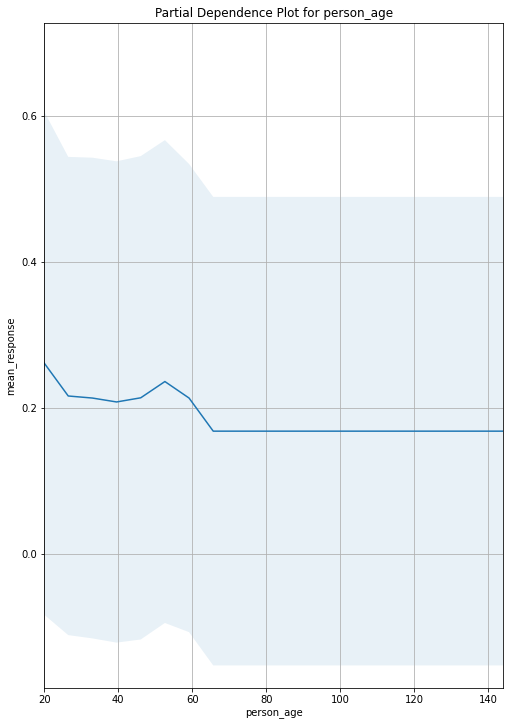

In [ ]:
#generates partial dependence plots for the feature column
best_model.partial_plot(df, cols=['person_age'])


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_9_AutoML_3_20230228_122236 on column 'person_age'.
person_age    mean_response    stddev_response    std_error_mean_response
------------  ---------------  -----------------  -------------------------
20            0.261401         0.345113           0.00191196
26.5263       0.216045         0.32789            0.00181654
33.0526       0.213228         0.329604           0.00182604
39.5789       0.207859         0.330007           0.00182827
46.1053       0.21356          0.331422           0.00183611
52.6316       0.235861         0.331051           0.00183405
59.1579       0.213216         0.321021           0.00177849
65.6842       0.167821         0.321259           0.00177981
72.2105       0.167821         0.321259           0.00177981
78.7368       0.167821         0.321259           0.00177981
85.2632       0.167821         0.321259           0.00177981
91.7895       0.167821         0.321259           0.00177981
98.3158   

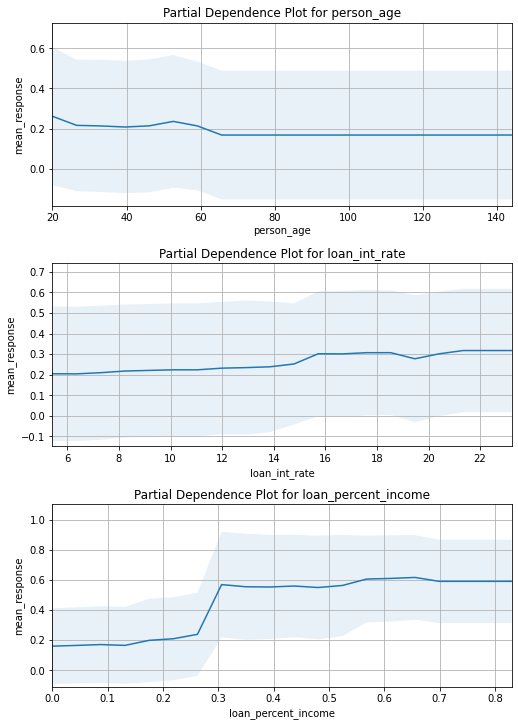

In [ ]:
best_model.partial_plot(df, cols=['person_age', 'loan_int_rate', 'loan_percent_income'])


#### **Is the relationship significant?**

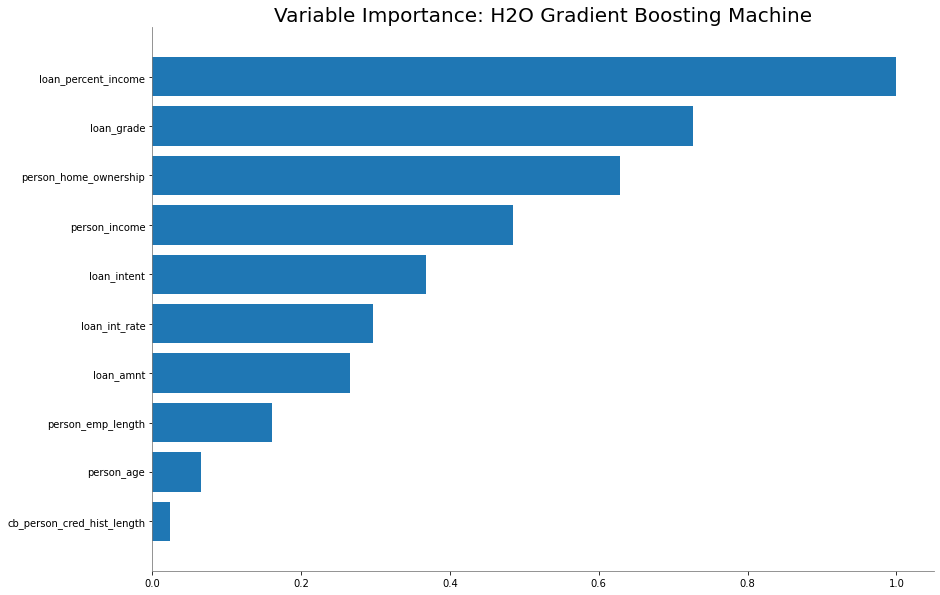

<Figure size 432x288 with 0 Axes>

In [ ]:
#which features are most predictive of the target variable, and can aid in feature selection and interpretation of the model.

if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()


The above graph is a variable Importance Graph on the H20's Gradient Boosting Machine.
We can Interpret that loan_percent_income is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)
cb_person_crd_hist_length is 0.1

#### **Are any model assumptions violated?**

No, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.



In [ ]:
best_model.model_performance()


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.04625000935226757
RMSE: 0.21505815341964502
MAE: 0.1122866136945091
RMSLE: 0.14884088254593722
Mean Residual Deviance: 0.04625000935226757

MSE value indicates that the model is better at predicting the output variable, as it means that the predicted values are closer to the actual values.

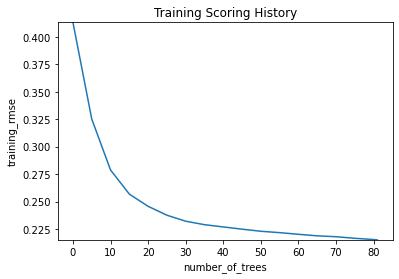

In [ ]:
best_model.plot()


In [ ]:
# identify whether the variable follows a normal distribution and whether there are any outliers or skewness in the distribution

import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
url1 = "https://raw.githubusercontent.com/sonalibandi/DSEM/main/credit_risk_dataset.csv"
df1=pd.read_csv(url)

def diagnostic_plots(df, variable):

    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.histplot(data = df1, x=variable, bins=30, kde=True)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.show()

In [ ]:
num_columns=df1[['person_age','person_income','person_emp_length', 'loan_int_rate','loan_percent_income']].columns
num_columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_int_rate',
       'loan_percent_income'],
      dtype='object')

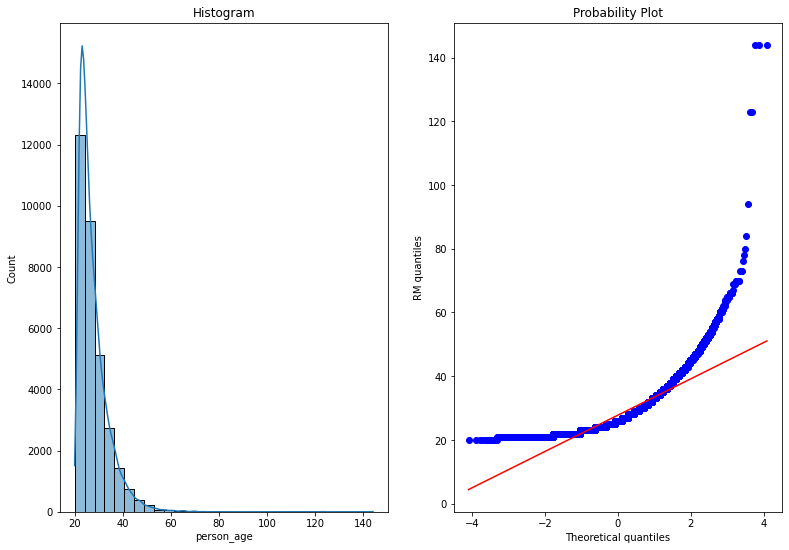

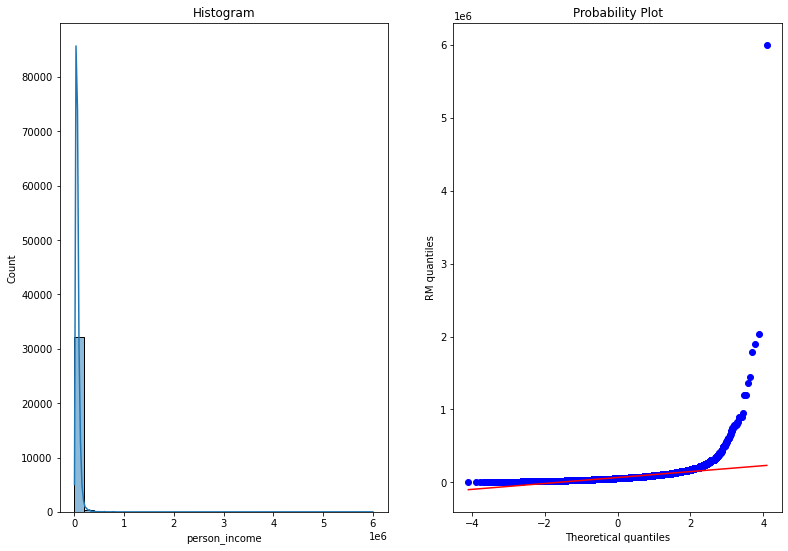

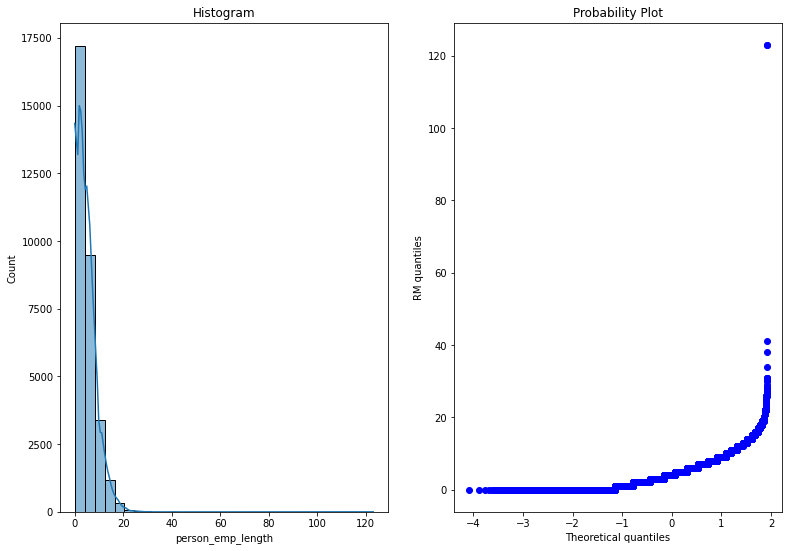

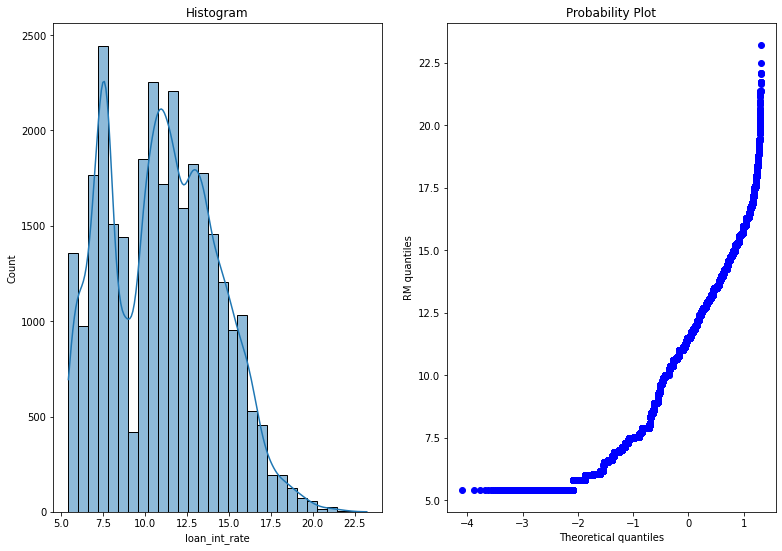

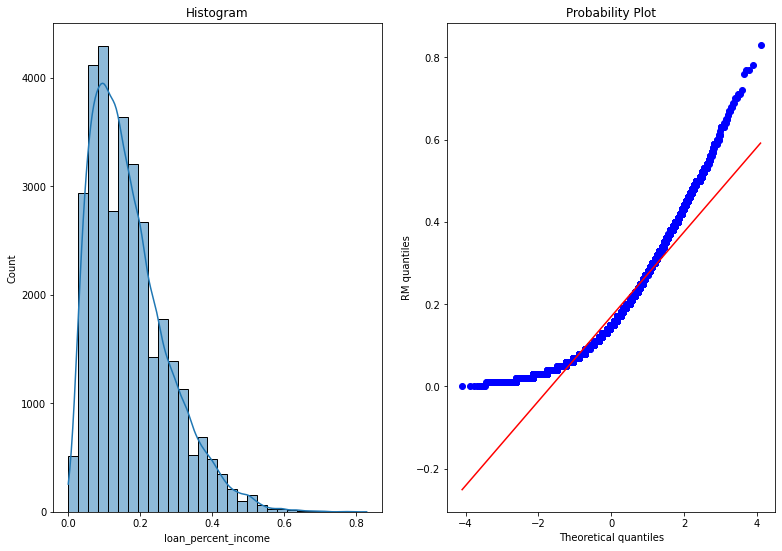

In [ ]:
for i in num_columns:
    diagnostic_plots(df1,i)

* person_age has mean 27.7 , slightly right skewed. There are potential outliers in this normal distribution.

* There are few outliers in few of the predictor variables like in person_age,
person_income, person_emp_length  

* loan_percent_income closely follows normal distribution.

In [ ]:
import pandas as pd
import seaborn as sns
url2 = "https://raw.githubusercontent.com/sonalibandi/DSEM/main/credit_risk_dataset.csv"
df2=pd.read_csv(url2)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df2['person_home_ownership'])

# printing label
label


array([3, 2, 0, ..., 3, 0, 3])

In [ ]:
df2.drop("person_home_ownership", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'loan_intent'
df2["person_home_ownership"] = label

# printing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df2['loan_intent'])

# printing label
label


array([4, 1, 3, ..., 2, 4, 3])

In [ ]:
df2.drop("loan_intent", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'loan_intent'
df2["loan_intent"] = label

# printing Data

In [ ]:
df2

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership,loan_intent
0,22,59000,123.0,D,35000,16.02,1,0.59,Y,3,3,4
1,21,9600,5.0,B,1000,11.14,0,0.10,N,2,2,1
2,25,9600,1.0,C,5500,12.87,1,0.57,N,3,0,3
3,23,65500,4.0,C,35000,15.23,1,0.53,N,2,3,3
4,24,54400,8.0,C,35000,14.27,1,0.55,Y,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,C,5800,13.16,0,0.11,N,30,0,4
32577,54,120000,4.0,A,17625,7.49,0,0.15,N,19,0,4
32578,65,76000,3.0,B,35000,10.99,1,0.46,N,28,3,2
32579,56,150000,5.0,B,15000,11.48,0,0.10,N,26,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df2['loan_grade'])

# printing label
label

array([3, 1, 2, ..., 1, 1, 1])

In [ ]:
df2.drop("loan_grade", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'loan_intent'
df2["loan_grade"] = label

# printing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df2['cb_person_default_on_file'])

# printing label
label

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
df2.drop("cb_person_default_on_file", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'loan_intent'
df2["cb_person_default_on_file"] = label

# printing Data

In [ ]:
df2

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,22,59000,123.0,35000,16.02,1,0.59,3,3,4,3,1
1,21,9600,5.0,1000,11.14,0,0.10,2,2,1,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,3,2,0
3,23,65500,4.0,35000,15.23,1,0.53,2,3,3,2,0
4,24,54400,8.0,35000,14.27,1,0.55,4,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,0,4,2,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,0,4,0,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,3,2,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,0,4,1,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


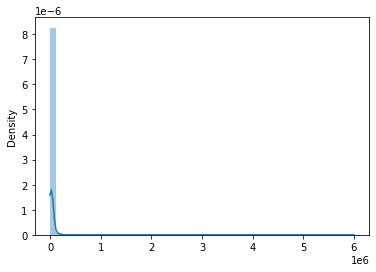

In [ ]:
#sns.distplot() will plot the KDE and histogram of the entire dataset.

df2=df2.iloc[:,1:-1]
ax=sns.distplot(df2)

#### **Is there any multi collinearity in the model?**


* Yes, from the VIF data, we could know that loan_amnt, loan_int_rate, loan_percent_income have more or less correlationship with each other

* From the Correlation matrix person_age and person_cred_hist_length are slightly positively correlated
- loan_percent_income and person_income are negatively correlated

* LOAN_AMNT have positive correlation with credit hist length.



***VIF is the measure of how much the variance of the estimated regression coefficient is increased due to multicollinearity.***

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# VIF dataframe
#url2 = "https://raw.githubusercontent.com/sonalibandi/DSEM/main/credit_risk_dataset.csv"
#df2=pd.read_csv(url3)

# calculates the VIF for each variable in the DataFrame, and returns a new DataFrame containing the variable names and their corresponding VIF values.

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [ ]:
#replace null values with mean


AverageReplace = df2['loan_int_rate'].mean()
df2['loan_int_rate'].fillna(AverageReplace, inplace=True)
df2

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade
0,59000,123.0,35000,16.02,1,0.59,3,3,4,3
1,9600,5.0,1000,11.14,0,0.10,2,2,1,1
2,9600,1.0,5500,12.87,1,0.57,3,0,3,2
3,65500,4.0,35000,15.23,1,0.53,2,3,3,2
4,54400,8.0,35000,14.27,1,0.55,4,3,3,2
...,...,...,...,...,...,...,...,...,...,...
32576,53000,1.0,5800,13.16,0,0.11,30,0,4,2
32577,120000,4.0,17625,7.49,0,0.15,19,0,4,0
32578,76000,3.0,35000,10.99,1,0.46,28,3,2,1
32579,150000,5.0,15000,11.48,0,0.10,26,0,4,1


In [ ]:
#replacing null values with the mean value
AverageReplace1 = df2['person_emp_length'].mean()
df2['person_emp_length'].fillna(AverageReplace1, inplace=True)
df2

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade
0,59000,123.0,35000,16.02,1,0.59,3,3,4,3
1,9600,5.0,1000,11.14,0,0.10,2,2,1,1
2,9600,1.0,5500,12.87,1,0.57,3,0,3,2
3,65500,4.0,35000,15.23,1,0.53,2,3,3,2
4,54400,8.0,35000,14.27,1,0.55,4,3,3,2
...,...,...,...,...,...,...,...,...,...,...
32576,53000,1.0,5800,13.16,0,0.11,30,0,4,2
32577,120000,4.0,17625,7.49,0,0.15,19,0,4,0
32578,76000,3.0,35000,10.99,1,0.46,28,3,2,1
32579,150000,5.0,15000,11.48,0,0.10,26,0,4,1


In [ ]:
X = df2.iloc[:,2:-1]
calc_vif(X)

,variables,VIF
0,loan_amnt,5.479593
1,loan_int_rate,7.213509
2,loan_status,1.631980
3,loan_percent_income,6.293000
4,cb_person_cred_hist_length,2.806906
5,person_home_ownership,2.600094
6,loan_intent,2.900651


In [ ]:
# generates predictions for the test dataset.

preds = aml.predict(df_test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
#extracts the model IDs from the leaderboard generated by AutoML

model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

#retrieves the metalearner model that was used to train the stacked ensemble.
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:926: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [ ]:
#returns the L1 norm of the coefficients of the metalearner model used to weight the predictions of the base models.

metalearner.coef_norm()


{'Intercept': 0.2184501280727954,
 'GBM_2_AutoML_1_20230228_121724': 0.0864140948619334,
 'GBM_3_AutoML_1_20230228_121724': 0.05148016673529588,
 'GBM_4_AutoML_1_20230228_121724': 0.06782782443497472,
 'GBM_5_AutoML_1_20230228_121724': 0.021198249599615557,
 'GBM_1_AutoML_1_20230228_121724': 0.0,
 'XGBoost_3_AutoML_1_20230228_121724': 0.027218943874899287,
 'DRF_1_AutoML_1_20230228_121724': 0.0,
 'XGBoost_2_AutoML_1_20230228_121724': 0.04320473198390532,
 'XGBoost_1_AutoML_1_20230228_121724': 0.04869060886692387,
 'XRT_1_AutoML_1_20230228_121724': 0.0,
 'DeepLearning_1_AutoML_1_20230228_121724': 0.0,
 'GLM_1_AutoML_1_20230228_121724': 0.0}

######L1 norm indicates that the model gives more equal weight to all features or base models.

#### **In the multivariate models are predictor variables independent of all the other predictor variables?**


No, they are not all independent of each other, we can know that from the correlation heap map.

* From the Correlation heat map person_age and person_cred_hist_length are slightly positively correlated
- loan_percent_income and person_income are negatively correlated
* loan_status and person_income are negatively correlated

* LOAN_AMNT have positive correlation with credit hist length.

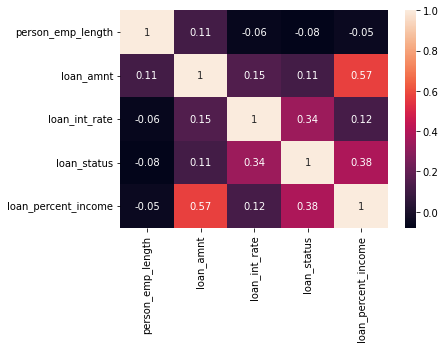

In [ ]:
url5 = "https://raw.githubusercontent.com/sonalibandi/DSEM/main/credit_risk_dataset.csv"
df5=pd.read_csv(url5)
df5=df5.iloc[:,2:-1]
cor_h2o=df5.corr(method='pearson',min_periods=1).round(2)
sns.heatmap(cor_h2o, annot=True)
plt.show()

<AxesSubplot:>

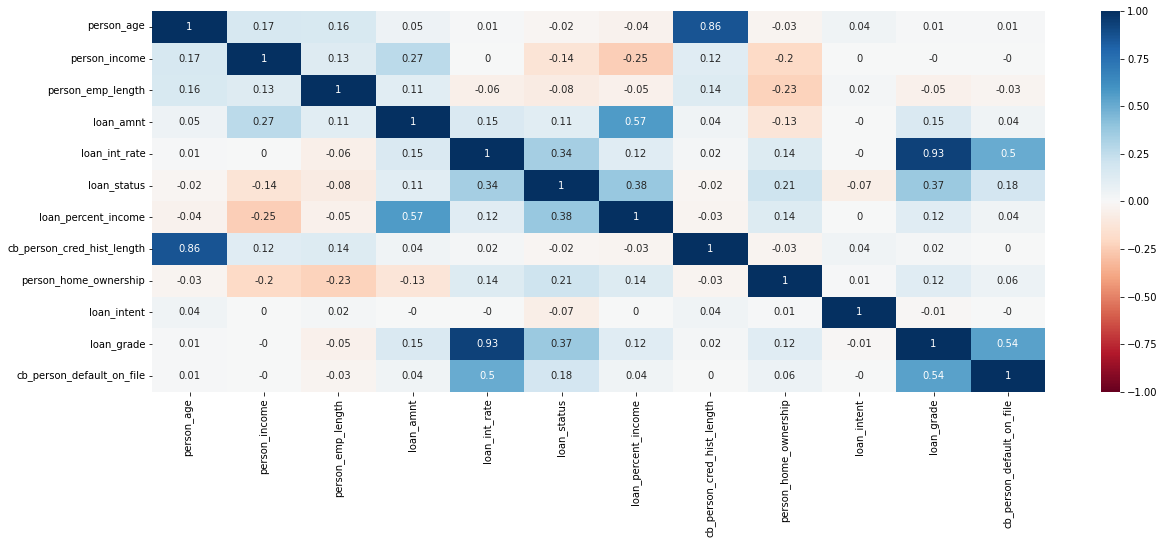

In [ ]:
#the heat map of the correlation
import seaborn as sns
plt.figure(figsize=(20,7))
cor_h2o=df2.corr(method='pearson',min_periods=1).round(2)

sns.heatmap(cor_h2o, annot=True,cmap='RdBu', vmin=-1, vmax=1)


<AxesSubplot:>

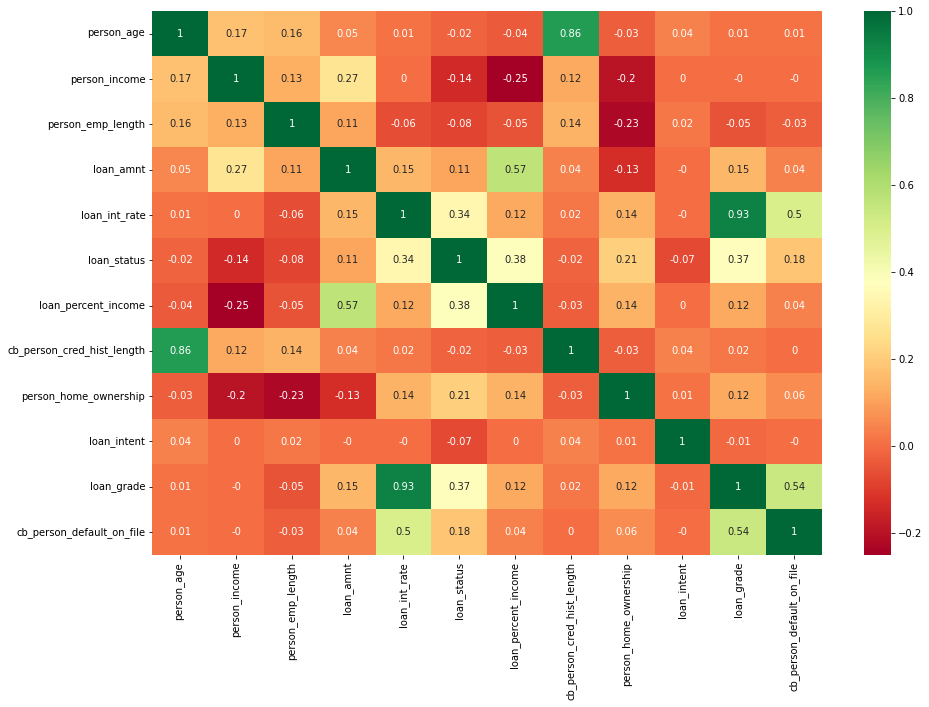

In [ ]:
# heatmap
plt.figure(figsize=(15,10))
cor_h2o=df2.corr(method='pearson',min_periods=1).round(2)

sns.heatmap(cor_h2o,annot = True,cmap="RdYlGn")

#### **In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**


 the most significant predictor variable is loan_grade, however, loan_grade is actually the assignment of grades based on the credit history, loan_percent_income is the most significant feature

In [ ]:
# creates and trains generalized linear models (GLMs) in H2O, which are a class of statistical models that generalize linear regression to handle non-normal response variables.

from h2o.estimators.glm import H2OGeneralizedLinearEstimator

model_glm=H2OGeneralizedLinearEstimator(family = 'poisson', lambda_ = 0,
                                             remove_collinear_columns = True,
                                             compute_p_values = True)

In [ ]:
predictors=['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income','loan_grade', 'cb_person_cred_hist_length', 'loan_intent','cb_person_default_on_file']

In [ ]:
response='loan_status'


In [ ]:

# trains the model_glm, on a training dataset df_train and evaluates its performance on df_test.

model_glm.train(x = predictors, y = response, training_frame = df_train, validation_frame = df_test)


glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677626745575_20


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    poisson   log     None              19                            19                             6                       py_4_sid_a256

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.13460438396065585
RMSE: 0.36688470118097843
MAE: 0.2497472724240968
RMSLE: 0.24092505779467252
Mean Residual Deviance: 0.46225837698441913
R^2: 0.21423454660415064
Null degrees of freedom: 26089
Residual degrees of freedom: 26070
Null deviance: 17367.35758859684
Residual deviance: 12060.321055523495
AIC: 23552.32105552348

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.1315223262676828
RMSE: 0.36266006985561944
MAE: 0.24440518598268807
RMSLE: 0.23742383247747167
Mean Residual Deviance: 0.4520898318464975
R^2: 0.21516429167665774
Null degrees of freedom: 6490
Residual degrees of freedom: 6471
Null deviance: 4276.875765906903
Residual deviance: 2934.515098515615
AIC: 5738.515098515617

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective    training_rmse        training_deviance    training_mae        training_r2          validation_rmse      validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------  -------------------  -------------------  ------------------  -------------------  -------------------  ---------------------  -------------------  -------------------
    2023-03-01 04:23:03  0.000 sec   0             17367.4                    0.665671
    2023-03-01 04:23:03  0.169 sec   1             12822                      0.491455
    2023-03-01 04:23:03  0.211 sec   2             12123.9                    0.464696
    2023-03-01 04:23:03  0.247 sec   3             12102.8                    0.463886
    2023-03-01 04:23:03  0.270 sec   4             12062.1                    0.462328
    2023-03-01 04:23:03  0.286 sec   5             12060.3                    0.462258
    2023-03-01 04:23:03  0.303 sec   6             12060.3                    0.462258     0.36688470118097843  0.46225837698441913  0.2497472724240968  0.21423454660415064  0.36266006985561944  0.4520898318464975     0.24440518598268807  0.21516429167665774

Variable Importances: 
variable                     relative_importance    scaled_importance    percentage
---------------------------  ---------------------  -------------------  ------------
loan_grade.G                 1.76562                1                    0.182659
loan_grade.F                 1.48092                0.838751             0.153206
loan_grade.E                 1.46893                0.83196              0.151965
loan_grade.D                 1.41218                0.799818             0.146094
loan_intent.VENTURE          0.61898                0.350573             0.0640353
loan_percent_income          0.503259               0.285032             0.0520637
loan_grade.C                 0.484805               0.27458              0.0501545
loan_intent.EDUCATION        0.46576                0.263793             0.0481843
person_income                0.333188               0.188708             0.0344693
loan_grade.B                 0.321794               0.182255             0.0332905
loan_intent.PERSONAL         0.317355               0.179741             0.0328314
loan_amnt                    0.161619               0.0915367            0.01672
loan_int_rate                0.092362               0.0523113            0.00955513
loan_intent.MEDICAL          0.0768939              0.04

In [ ]:
# measures predictor variable contribution to the performance of the model

varimp = model_glm.varimp(use_pandas=True)


In [ ]:
print(varimp)


                       variable  relative_importance  scaled_importance  \
0                  loan_grade.G             1.765625           1.000000   
1                  loan_grade.F             1.480919           0.838751   
2                  loan_grade.E             1.468928           0.831960   
3                  loan_grade.D             1.412178           0.799818   
4           loan_intent.VENTURE             0.618980           0.350573   
5           loan_percent_income             0.503259           0.285032   
6                  loan_grade.C             0.484805           0.274580   
7         loan_intent.EDUCATION             0.465760           0.263793   
8                 person_income             0.333188           0.188708   
9                  loan_grade.B             0.321794           0.182255   
10         loan_intent.PERSONAL             0.317355           0.179741   
11                    loan_amnt             0.161619           0.091537   
12                loan_in

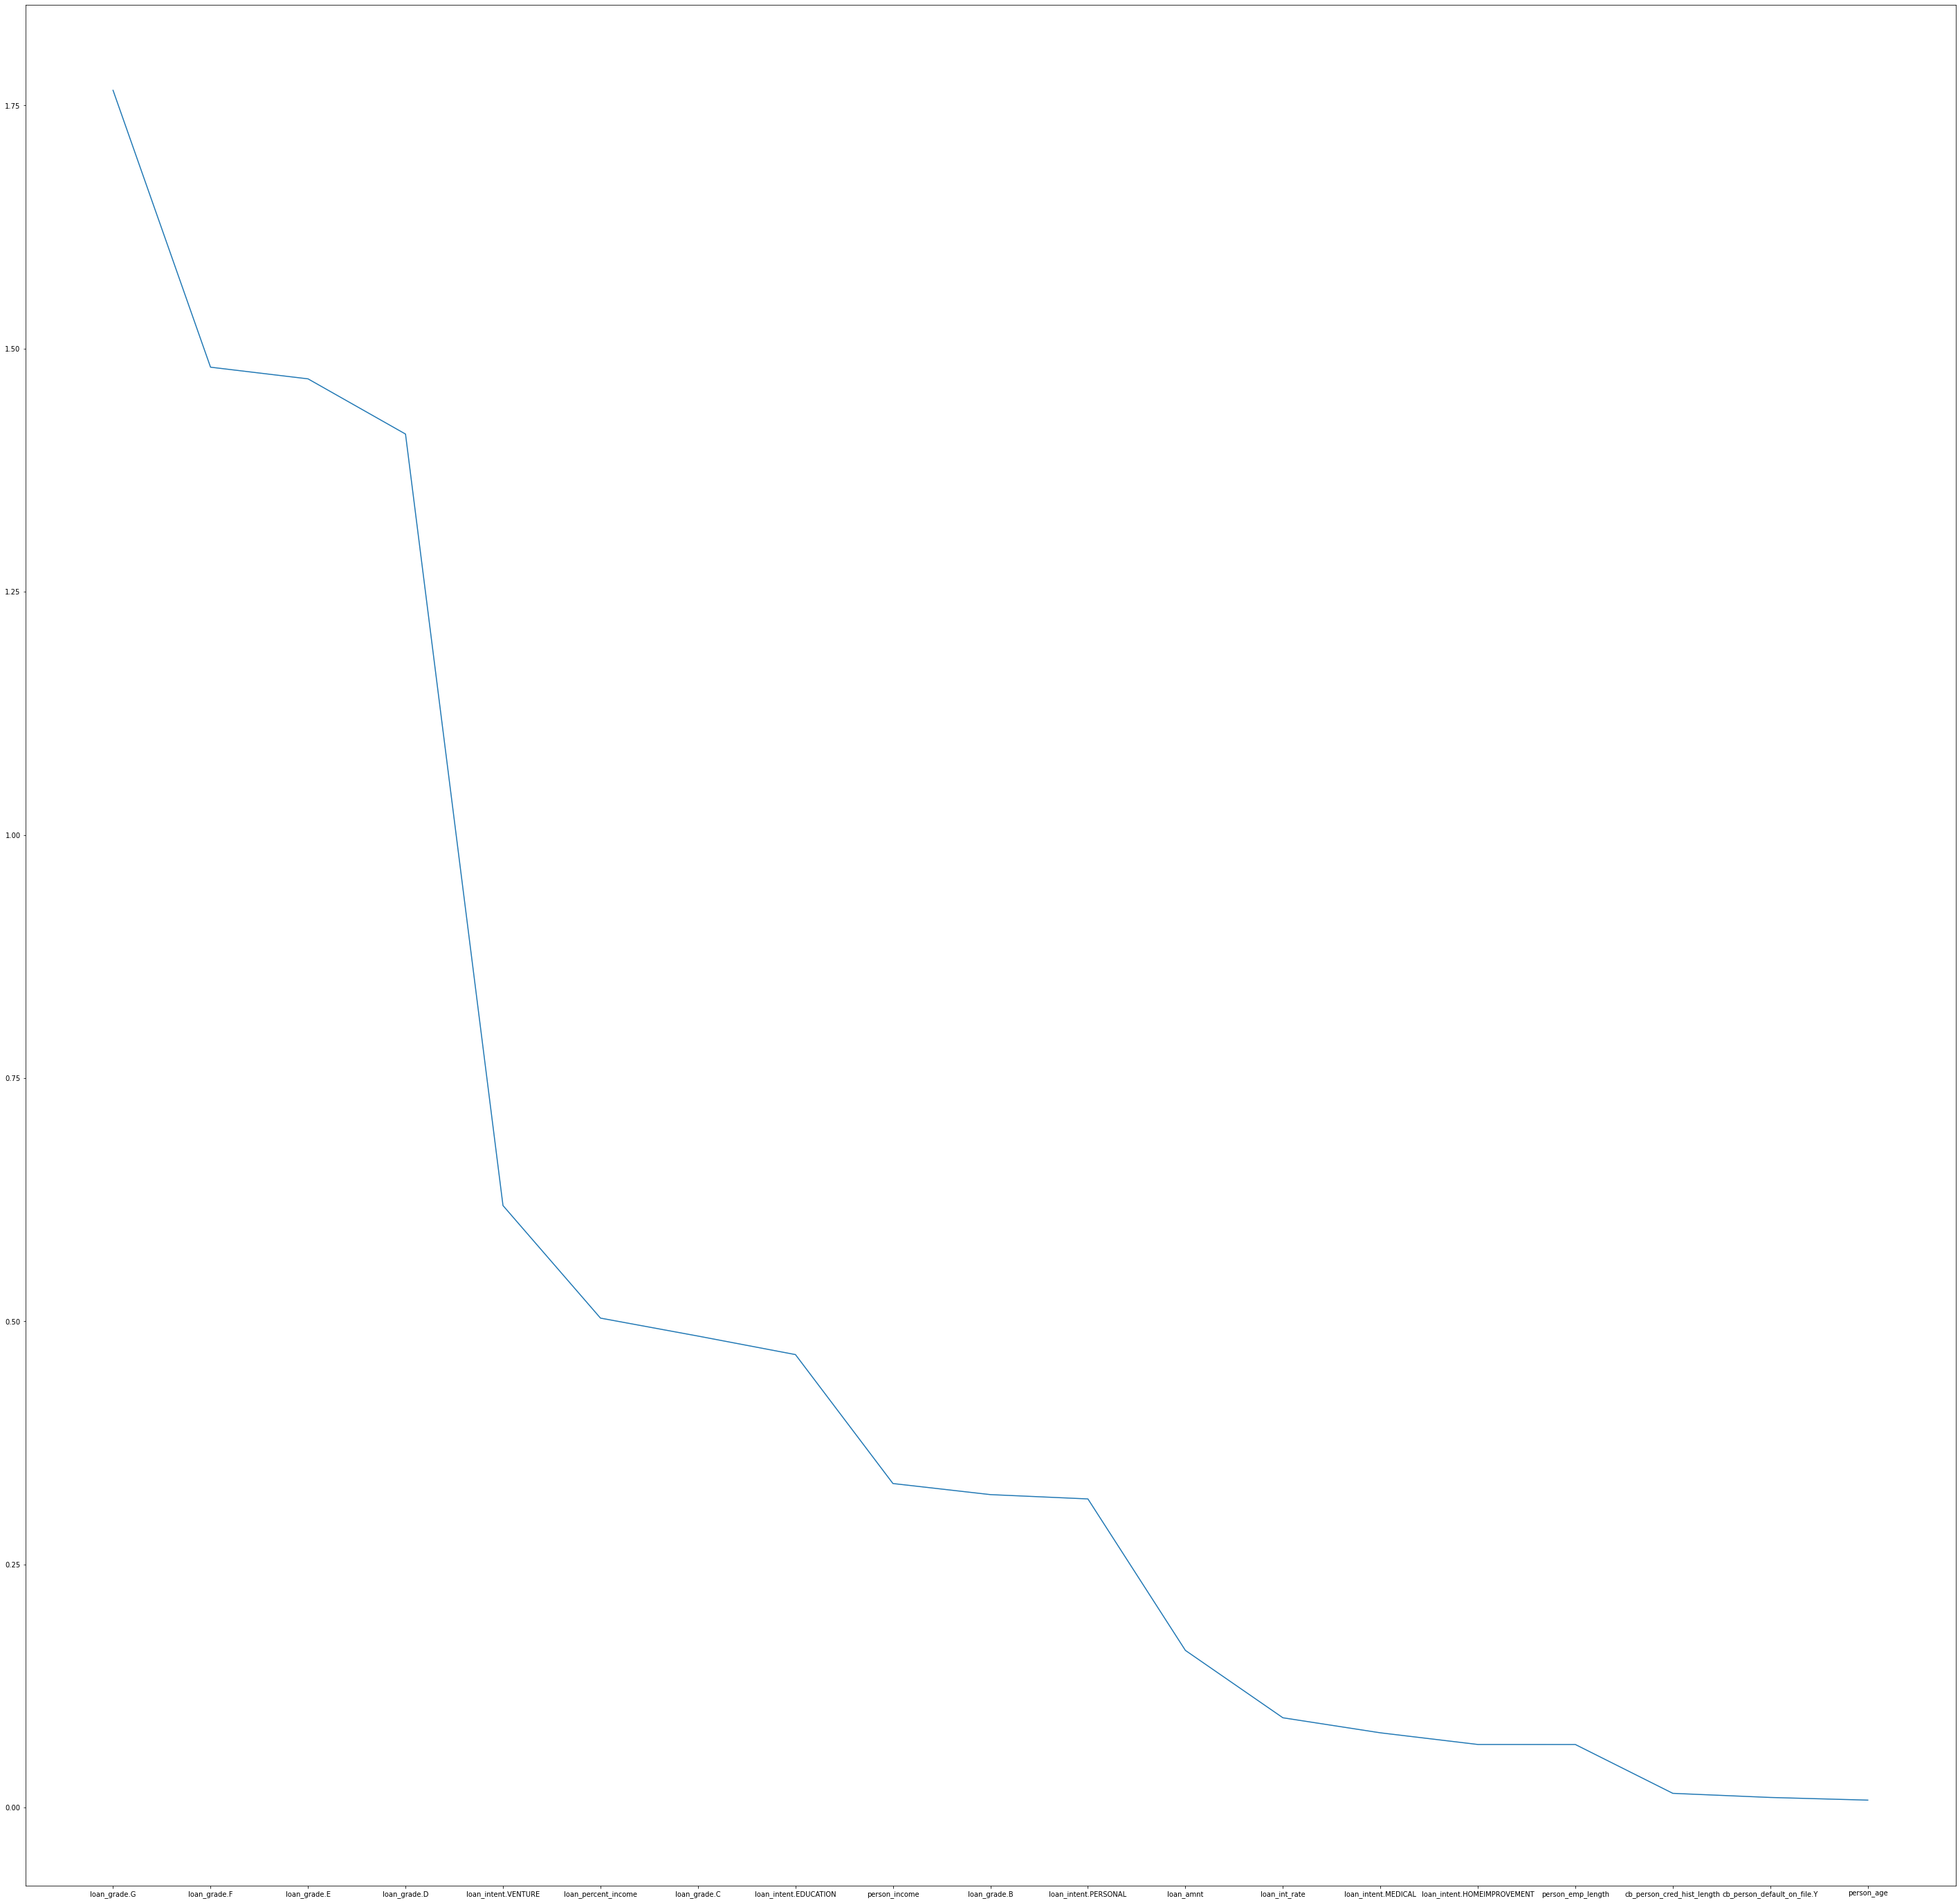

In [ ]:
plt.figure(figsize=(50,50))

plt.plot(varimp['variable'],varimp['relative_importance'])




#### **Does the model make sense?**


As per the model summary R^2 value is 0.2 for the model which is referred as high accuracy of the model with the help of H2o Auto ML



#### **Does regularization help?**


Yes regularization helped with RMSE value after it is 0.35

MSE 0.05 to 0.12


In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# The model (charges_glm) uses the gaussian family to model a continuous response variable and sets the regularization parameter lambda to 0, indicating that there is no regularization penalty applied to the model.
charges_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)

# The model (charges_glm_regularization) also uses the gaussian family and specifies a value of 0.001 for the lambda parameter. This means that the model is using a small amount of L2 regularization to help prevent overfitting
charges_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)


In [ ]:
pct_rows=0.80
df1_train,df1_test = df.split_frame([pct_rows])

In [ ]:
df_reg= df.drop(['person_home_ownership', 'loan_intent','loan_grade','cb_person_default_on_file'], axis = 1)
X=df_reg.columns

In [ ]:
charges_glm_regularization.train(x = X, y= y,training_frame = df_reg)


glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677626745575_21


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  7                             7                              1                       py_11_sid_a256

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.128138567492131
RMSE: 0.35796447797530273
MAE: 0.2747346056340058
RMSLE: 0.25433181684440137
Mean Residual Deviance: 0.128138567492131
R^2: 0.2487557351402696
Null degrees of freedom: 32580
Residual degrees of freedom: 32573
Null deviance: 5557.290568122975
Residual deviance: 4174.88266746112
AIC: 25536.54774686396

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  ------------------  ------------------
    2023-03-01 04:40:57  0.000 sec   0             5557.290568122975          0.17056844688999645
    2023-03-01 04:40:57  0.074 sec   1                                                             0.35796447797530273  0.128138567492131    0.2747346056340058  0.2487557351402696

Variable Importances: 
variable                    relative_importance    scaled_importance    percentage
--------------------------  ---------------------  -------------------  ------------
loan_percent_income         0.197255               1                    0.448812
loan_int_rate               0.127386               0.645796             0.289841
loan_amnt                   0.0893835              0.453137             0.203373
person_income               0.0152281              0.0772003            0.0346484
person_emp_length           0.00893197             0.0452814            0.0203228
person_age                  0.0012875              0.00652708           0.00292943
cb_person_cred_hist_length  3.17085e-05            0.000160749          7.21462e-05

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

#### **Which independent variables are significant?**


0.93 from below loan_int_rate and loan_grade are most correlated variables in dataset

In [ ]:
url6 = "https://raw.githubusercontent.com/sonalibandi/DSEM/main/credit_risk_dataset.csv"
dfv=pd.read_csv(url6)


dfv=dfv.iloc[:,2:-1]
cor_h2o=dfv.corr(method='pearson',min_periods=1).round(2)

In [ ]:
import seaborn as sns


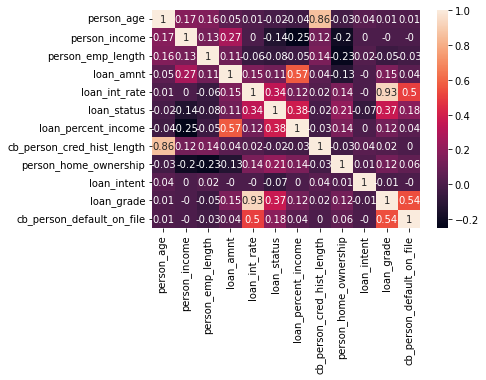

In [ ]:
sns.heatmap(cor_h2o, annot=True)
plt.show()

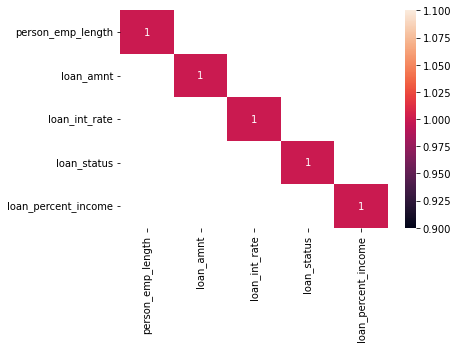

In [ ]:

cor_h2o = cor_h2o.unstack()
cor_h2o = cor_h2o[abs(cor_h2o) >= 0.7]
sns.heatmap(cor_h2o, annot=True)
plt.show()


#### **Which hyperparameters are important?**


all hyperparameters are important because they determined the way model works, however, there are some more important one, such as gamma,max depth, split datasets, learn_rate in GBM.



**REFERENCES**

1. https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

2. https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e


### **Licensing and Citation H2o.ai**

Copyright (c) 2023 Sonali Bandi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

